In [11]:
import os 
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime, date, timedelta
import numpy as np
import pandas as pd
import glob
from pyhdf.SD import SD, SDC
import h5py
import statsmodels.api as sm
from scipy import stats
from math import floor
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
#check for land-sea mask
from global_land_mask import globe

# read Terra data
cfnames=glob.glob('/data/keeling/a/yulanh/mydata/OT_modis/plot_output/OT_property_record_*')

Terra_allcOT_lat=np.empty((0),'f')
Terra_allcOT_lon=np.empty((0),'f')
Terra_allota = np.empty((0),'f')
Terra_allcmin_bt11=np.empty((0),'f')
Terra_allcave_bt11=np.empty((0),'f')
Terra_allcave_bt67=np.empty((0),'f')
Terra_allcave_cibt11=np.empty((0),'f')
Terra_allctrop_T=np.empty((0),'f')
Terra_allchetero=np.empty((0),'f')
Terra_alldnflag =np.empty((0),'i')
Terra_allcOT_ctlat=np.empty((0),'f')
Terra_allcOT_ctlon=np.empty((0),'f')
Terra_allcmin_ctbt11=np.empty((0),'f')

#cfnames=cfnames[0:1]
for cfname in cfnames:
    df=pd.read_csv(cfname,sep=', ',index_col=False)
    cOT_lat=df['lat'].astype(float)
    cOT_lon=df['lon'].astype(float)
    cota = df['ota'].astype(float)
    cmin_bt11=df['min_BT11'].astype(float)
    cave_bt11=df['ave_BT11'].astype(float)
    cave_bt67=df['ave_BT67'].astype(float)
    cave_cibt11=df['ave_ciBT11'].astype(float)
    ctrop_T=df['tropoauseT'].astype(float)
    chetero=df['heterogeneity'].astype(float)
    dnflag =df['dnflag']
    ctlat=df['ct_lat'].astype(float)
    ctlon=df['ct_lon'].astype(float)
    ctbt11=df['ct_min_BT11'].astype(float)
    
    Terra_allcOT_lat=np.append(Terra_allcOT_lat,cOT_lat)
    Terra_allcOT_lon=np.append(Terra_allcOT_lon,cOT_lon)
    Terra_allcOT_ctlat=np.append(Terra_allcOT_ctlat,ctlat)
    Terra_allcOT_ctlon=np.append(Terra_allcOT_ctlon,ctlon)
    Terra_allota = np.append(Terra_allota,cota)
    Terra_allcmin_bt11=np.append(Terra_allcmin_bt11,cmin_bt11)
    Terra_allcmin_ctbt11=np.append(Terra_allcmin_ctbt11,ctbt11)
    Terra_allcave_bt11=np.append(Terra_allcave_bt11,cave_bt11)
    Terra_allcave_bt67=np.append(Terra_allcave_bt67,cave_bt67)
    Terra_allcave_cibt11=np.append(Terra_allcave_cibt11,cave_cibt11)
    Terra_allctrop_T=np.append(Terra_allctrop_T,ctrop_T)
    Terra_allchetero=np.append(Terra_allchetero,chetero)
    Terra_alldnflag =np.append(Terra_alldnflag,dnflag)


    
ind=np.where(Terra_allcmin_bt11 < 150)[0]
Terra_allcmin_bt11[ind]=np.nan
ind=np.where((Terra_allcmin_ctbt11 < 150) & (Terra_allcOT_ctlat < -90))[0]
Terra_allcmin_ctbt11[ind]=np.nan
Terra_allcOT_ctlat[ind] = np.nan
Terra_allcOT_ctlon[ind] = np.nan
# read Aqua data
cfnames=glob.glob('/data/keeling/a/yulanh/mydata/OT_modis/plot_output/Aqua_OT_property_record_*')

Aqua_allcOT_lat=np.empty((0),'f')
Aqua_allcOT_lon=np.empty((0),'f')
Aqua_allota = np.empty((0),'f')
Aqua_allcmin_bt11=np.empty((0),'f')
Aqua_allcave_bt11=np.empty((0),'f')
Aqua_allcave_bt67=np.empty((0),'f')
Aqua_allcave_cibt11=np.empty((0),'f')
Aqua_allctrop_T=np.empty((0),'f')
Aqua_allchetero=np.empty((0),'f')
Aqua_alldnflag =np.empty((0),'i')
Aqua_allcOT_ctlat=np.empty((0),'f')
Aqua_allcOT_ctlon=np.empty((0),'f')
Aqua_allcmin_ctbt11=np.empty((0),'f')

#cfnames=cfnames[0:1]
for cfname in cfnames:
    print(cfname)
    df=pd.read_csv(cfname,sep=', ',index_col=False)
    cOT_lat=df['lat'].astype(float)
    cOT_lon=df['lon'].astype(float)
    cota = df['ota'].astype(float)
    cmin_bt11=df['min_BT11'].astype(float)
    cave_bt11=df['ave_BT11'].astype(float)
    cave_bt67=df['ave_BT67'].astype(float)
    cave_cibt11=df['ave_ciBT11'].astype(float)
    ctrop_T=df['tropoauseT'].astype(float)
    chetero=df['heterogeneity'].astype(float)
    dnflag =df['dnflag']
    ctlat=df['ct_lat'].astype(float)
    ctlon=df['ct_lon'].astype(float)
    ctbt11=df['ct_min_BT11'].astype(float)
    
    Aqua_allcOT_lat=np.append(Aqua_allcOT_lat,cOT_lat)
    Aqua_allcOT_lon=np.append(Aqua_allcOT_lon,cOT_lon)
    Aqua_allcOT_ctlat=np.append(Aqua_allcOT_ctlat,ctlat)
    Aqua_allcOT_ctlon=np.append(Aqua_allcOT_ctlon,ctlon)
    Aqua_allota = np.append(Aqua_allota,cota)
    Aqua_allcmin_bt11=np.append(Aqua_allcmin_bt11,cmin_bt11)
    Aqua_allcmin_ctbt11=np.append(Aqua_allcmin_ctbt11,ctbt11)
    Aqua_allcave_bt11=np.append(Aqua_allcave_bt11,cave_bt11)
    Aqua_allcave_bt67=np.append(Aqua_allcave_bt67,cave_bt67)
    Aqua_allcave_cibt11=np.append(Aqua_allcave_cibt11,cave_cibt11)
    Aqua_allctrop_T=np.append(Aqua_allctrop_T,ctrop_T)
    Aqua_allchetero=np.append(Aqua_allchetero,chetero)
    Aqua_alldnflag =np.append(Aqua_alldnflag,dnflag)
    #print(allchetero.shape,chetero.shape)
    #print(cOT_lat[0],cmin_bt11[0],cave_bt11[0],cave_bt67[0],cave_cibt11[0],ctrop_T[0],chetero[0])

    #plt.plot(cOT_lat)
ind=np.where(Aqua_allcmin_bt11 < 150)[0]
Aqua_allcmin_bt11[ind]=np.nan
ind=np.where((Aqua_allcmin_ctbt11 < 150) & (Aqua_allcOT_ctlat < -90))[0]
Aqua_allcmin_ctbt11[ind]=np.nan
Aqua_allcOT_ctlat[ind] = np.nan
Aqua_allcOT_ctlon[ind] = np.nan

/tmp/ipykernel_8170/2947163407.py:36: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv(cfname,sep=', ',index_col=False)
/tmp/ipykernel_8170/2947163407.py:36: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv(cfname,sep=', ',index_col=False)
/tmp/ipykernel_8170/2947163407.py:36: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv(cfname,sep=', ',index_col=False)
/tmp/ipykernel_8170

/data/keeling/a/yulanh/mydata/OT_modis/plot_output/Aqua_OT_property_record_2005.txt


/tmp/ipykernel_8170/2947163407.py:93: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv(cfname,sep=', ',index_col=False)


/data/keeling/a/yulanh/mydata/OT_modis/plot_output/Aqua_OT_property_record_2013.txt


/tmp/ipykernel_8170/2947163407.py:93: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv(cfname,sep=', ',index_col=False)


/data/keeling/a/yulanh/mydata/OT_modis/plot_output/Aqua_OT_property_record_2014.txt


/tmp/ipykernel_8170/2947163407.py:93: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv(cfname,sep=', ',index_col=False)


/data/keeling/a/yulanh/mydata/OT_modis/plot_output/Aqua_OT_property_record_2002.txt


/tmp/ipykernel_8170/2947163407.py:93: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv(cfname,sep=', ',index_col=False)


/data/keeling/a/yulanh/mydata/OT_modis/plot_output/Aqua_OT_property_record_2010.txt


/tmp/ipykernel_8170/2947163407.py:93: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv(cfname,sep=', ',index_col=False)


/data/keeling/a/yulanh/mydata/OT_modis/plot_output/Aqua_OT_property_record_2019.txt


/tmp/ipykernel_8170/2947163407.py:93: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv(cfname,sep=', ',index_col=False)


/data/keeling/a/yulanh/mydata/OT_modis/plot_output/Aqua_OT_property_record_2009.txt


/tmp/ipykernel_8170/2947163407.py:93: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv(cfname,sep=', ',index_col=False)


/data/keeling/a/yulanh/mydata/OT_modis/plot_output/Aqua_OT_property_record_2018.txt


/tmp/ipykernel_8170/2947163407.py:93: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv(cfname,sep=', ',index_col=False)


/data/keeling/a/yulanh/mydata/OT_modis/plot_output/Aqua_OT_property_record_2003.txt


/tmp/ipykernel_8170/2947163407.py:93: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv(cfname,sep=', ',index_col=False)


/data/keeling/a/yulanh/mydata/OT_modis/plot_output/Aqua_OT_property_record_2011.txt


/tmp/ipykernel_8170/2947163407.py:93: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv(cfname,sep=', ',index_col=False)


/data/keeling/a/yulanh/mydata/OT_modis/plot_output/Aqua_OT_property_record_2006.txt


/tmp/ipykernel_8170/2947163407.py:93: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv(cfname,sep=', ',index_col=False)


/data/keeling/a/yulanh/mydata/OT_modis/plot_output/Aqua_OT_property_record_2015.txt


/tmp/ipykernel_8170/2947163407.py:93: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv(cfname,sep=', ',index_col=False)


/data/keeling/a/yulanh/mydata/OT_modis/plot_output/Aqua_OT_property_record_2007.txt


/tmp/ipykernel_8170/2947163407.py:93: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv(cfname,sep=', ',index_col=False)


/data/keeling/a/yulanh/mydata/OT_modis/plot_output/Aqua_OT_property_record_2016.txt


/tmp/ipykernel_8170/2947163407.py:93: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv(cfname,sep=', ',index_col=False)


/data/keeling/a/yulanh/mydata/OT_modis/plot_output/Aqua_OT_property_record_2020.txt


/tmp/ipykernel_8170/2947163407.py:93: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv(cfname,sep=', ',index_col=False)


/data/keeling/a/yulanh/mydata/OT_modis/plot_output/Aqua_OT_property_record_2004.txt


/tmp/ipykernel_8170/2947163407.py:93: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv(cfname,sep=', ',index_col=False)


/data/keeling/a/yulanh/mydata/OT_modis/plot_output/Aqua_OT_property_record_2012.txt


/tmp/ipykernel_8170/2947163407.py:93: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv(cfname,sep=', ',index_col=False)


/data/keeling/a/yulanh/mydata/OT_modis/plot_output/Aqua_OT_property_record_2008.txt


/tmp/ipykernel_8170/2947163407.py:93: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv(cfname,sep=', ',index_col=False)


/data/keeling/a/yulanh/mydata/OT_modis/plot_output/Aqua_OT_property_record_2017.txt


/tmp/ipykernel_8170/2947163407.py:93: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv(cfname,sep=', ',index_col=False)


/data/keeling/a/yulanh/mydata/OT_modis/plot_output/Aqua_OT_property_record_2021.txt


/tmp/ipykernel_8170/2947163407.py:93: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv(cfname,sep=', ',index_col=False)


Terra land and Ocean mean BT 186.67067766117876 187.6359065044695 167.80960478965255
Aqua land and Ocean mean BT 186.03575347886257 186.97356676493274


([<matplotlib.axis.YTick at 0x2ad1a4b6eb20>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

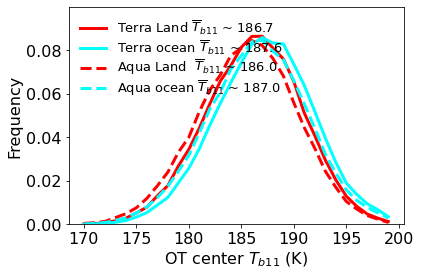

In [25]:
lnthick=3
fontsz=14
nrange=[170,200] #tropis
nbins=30

#nrange=[170,230]# midlat
#nbins=60
ind=np.where((Aqua_allcmin_ctbt11 < 150) | (Aqua_allcOT_ctlat < -90))[0]
Aqua_allcmin_ctbt11[ind]=np.nan
Aqua_allcOT_ctlat[ind] = np.nan
Aqua_allcOT_ctlon[ind] = np.nan

ind=np.where((Terra_allcmin_ctbt11 < 150) | (Terra_allcOT_ctlat < -90))[0]
Terra_allcmin_ctbt11[ind]=np.nan
Terra_allcOT_ctlat[ind] = np.nan
Terra_allcOT_ctlon[ind] = np.nan

Terra_land_mask=globe.is_land(Terra_allcOT_lat,Terra_allcOT_lon)
Terra_landind=np.where((abs(Terra_allcOT_ctlat) <= 25) & (Terra_land_mask) & (Terra_alldnflag ==1))[0]

Terra_ocean_mask=globe.is_ocean(Terra_allcOT_lat,Terra_allcOT_lon)
Terra_oceanind=np.where((abs(Terra_allcOT_ctlat) <= 25) & (Terra_ocean_mask) & (Terra_alldnflag ==1))[0] 

Terra_land_minbt =Terra_allcmin_ctbt11[Terra_landind]
Terra_ocean_minbt =Terra_allcmin_ctbt11[Terra_oceanind]
print('Terra land and Ocean mean BT',np.nanmean(Terra_land_minbt),np.nanmean(Terra_ocean_minbt),np.nanmin(Terra_ocean_minbt))

Aqua_land_mask=globe.is_land(Aqua_allcOT_lat,Aqua_allcOT_lon)
Aqua_landind=np.where((abs(Aqua_allcOT_ctlat) <= 25) & (Aqua_land_mask) & (Aqua_alldnflag ==1))[0]

Aqua_ocean_mask=globe.is_ocean(Aqua_allcOT_lat,Aqua_allcOT_lon)
Aqua_oceanind=np.where((abs(Aqua_allcOT_ctlat) <= 25) & (Aqua_ocean_mask) & (Aqua_alldnflag ==1))[0] 

Aqua_land_minbt =Aqua_allcmin_ctbt11[Aqua_landind]
Aqua_ocean_minbt =Aqua_allcmin_ctbt11[Aqua_oceanind]
print('Aqua land and Ocean mean BT',np.nanmean(Aqua_land_minbt),np.nanmean(Aqua_ocean_minbt))

plt.figure(figsize=([6,4]))
Terra_landhis=np.histogram(Terra_land_minbt,bins=nbins,range=nrange)
x=Terra_landhis[1]
plt.plot(x[0:len(x)-1],Terra_landhis[0]/np.sum(Terra_landhis[0]),'red',linewidth=lnthick,\
         label='Terra Land $\overline {T}_{b11}$ ~ ' + str(np.round(np.nanmean(Terra_land_minbt),decimals=1)))
Terra_oceanhis=np.histogram(Terra_ocean_minbt,bins=nbins,range=nrange)
plt.plot(x[0:len(x)-1],Terra_oceanhis[0]/np.sum(Terra_oceanhis[0]),'cyan',linewidth=lnthick,\
         label='Terra ocean $\overline {T}_{b11}$ ~ '+ str(np.round(np.nanmean(Terra_ocean_minbt),decimals=1)))

Aqua_landhis=np.histogram(Aqua_land_minbt,bins=nbins,range=nrange)
x=Aqua_landhis[1]
plt.plot(x[0:len(x)-1],Aqua_landhis[0]/np.sum(Aqua_landhis[0]),'red',linewidth=lnthick,linestyle='dashed',\
         label='Aqua Land  $\overline {T}_{b11}$ ~ '+ str(np.round(np.nanmean(Aqua_land_minbt),decimals=1)))
Aqua_oceanhis=np.histogram(Aqua_ocean_minbt,bins=nbins,range=nrange)
plt.plot(x[0:len(x)-1],Aqua_oceanhis[0]/np.sum(Aqua_oceanhis[0]),'cyan',linestyle='dashed',linewidth=lnthick,\
         label='Aqua ocean $\overline {T}_{b11}$ ~ '+ str(np.round(np.nanmean(Aqua_ocean_minbt),decimals=1)))
ld=plt.legend(frameon=False,fontsize=fontsz-1,labelspacing=0.1,loc=2,handlelength=2)
plt.ylabel('Frequency',fontsize=fontsz+2)
plt.xlabel('OT center $T_{b11}$ (K)',fontsize=fontsz+2)
plt.ylim([0,0.1])
plt.xticks(fontsize=fontsz+2)
plt.yticks(np.arange(0,0.1,0.02),fontsize=fontsz+2)

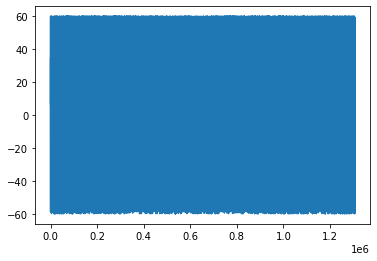

In [17]:
plt.plot(Terra_allcOT_ctlat)